In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('diabetes.csv')
#see first 5 rows of data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


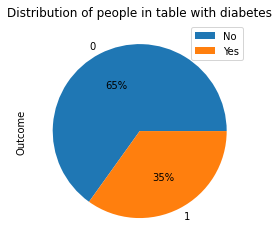

In [3]:
#pie chart for outcome distribution
df['Outcome'].value_counts().plot(kind='pie',autopct='%1.0f%%',
                                  title='Distribution of people in table with diabetes',legend=True)
plt.legend(['No','Yes'],loc='upper right')

In [4]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
#get information suchs as all column names and data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#checks for duplicated rows of data
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [8]:
#removing any duplicated data since leaving it present may contaminate the training process
dfMod=df.drop_duplicates()
dfMod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

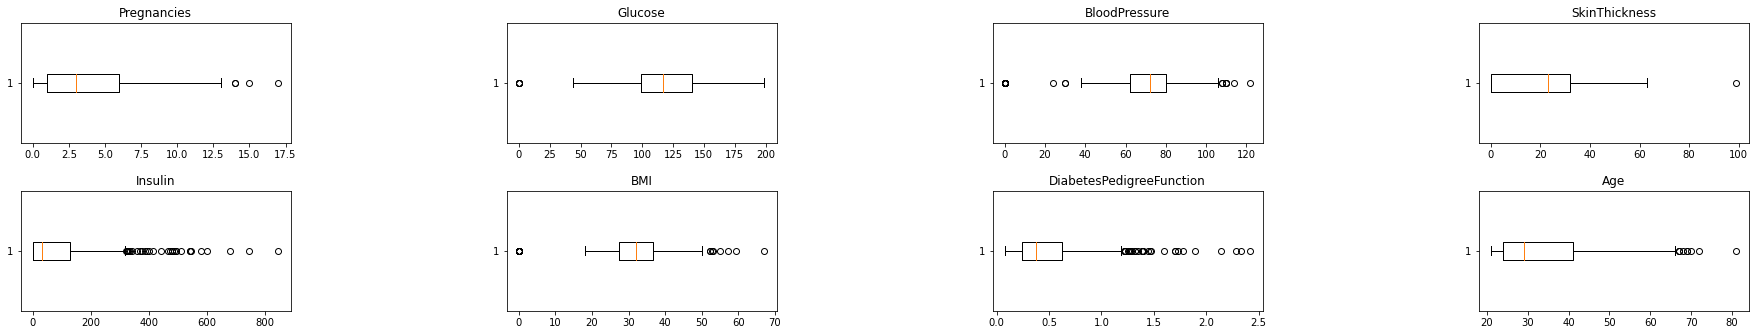

In [10]:
#plot box plots
figure,axis = plt.subplots(2, 4)
axis[0, 0].boxplot(df['Pregnancies'],vert=0)
axis[0, 0].set_title('Pregnancies')
axis[0, 1].boxplot(df['Glucose'],vert=0)
axis[0, 1].set_title('Glucose')
axis[0, 2].boxplot(df['BloodPressure'],vert=0)
axis[0, 2].set_title('BloodPressure')
axis[0, 3].boxplot(df['SkinThickness'],vert=0)
axis[0, 3].set_title('SkinThickness')
axis[1, 0].boxplot(df['Insulin'],vert=0)
axis[1, 0].set_title('Insulin')
axis[1, 1].boxplot(df['BMI'],vert=0)
axis[1, 1].set_title('BMI')
axis[1, 2].boxplot(df['DiabetesPedigreeFunction'],vert=0)
axis[1, 2].set_title('DiabetesPedigreeFunction')
axis[1, 3].boxplot(df['Age'],vert=0)
axis[1, 3].set_title('Age')
figure.subplots_adjust(left=1, right=5, bottom=1, top=2,
                    hspace=0.4, wspace=0.8)
plt.show()


In [11]:
""""the following function was taken from https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/ """
#finds outliers in a columns where they are suspected
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    #outliers are found using the interquartile range
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers
#finds outliers for all columns we will use that are not categories
sam=df.drop(['Outcome'], axis=1)

outliers = find_outliers_IQR(sam)
outliers.count()
#1248 outliers

Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
dtype: int64

In [12]:
'''funtion to remove outliers from dataset by using the dataset and column name. Rows are removed if they have an outlier  '''
def dropOutliers(df,colName):
    #the variable used is 'new_dfmod' as it is not changed unlike the data
    q1=df[colName].quantile(0.25)
    q3=df[colName].quantile(0.75)
    IQR=q3-q1
    #the rows with outliers are excluded from the data set
    no_outliers=df[((df[colName]>(q1-1.5*IQR)) & (df[colName]<(q3+1.5*IQR)))]
    return no_outliers

#list of column names that have outliers
columnNames=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
             'BMI','DiabetesPedigreeFunction','Age']

#iterates through the list of column names to call the 'dropOutliers' function
for i in range(0,len(columnNames)):
    if i==0:
        #first time the 'new_dfMod' is used as this is the only dataset available to use
        fin_df=dropOutliers(df,columnNames[i])
    else:#afterward the same dataset ('fin_df') is used as it needs to be updated with new changes
        fin_df=dropOutliers(fin_df,columnNames[i])

print(len(outliers))
print(len(fin_df))
#132 rows removed

768
636


In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [14]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               636 non-null    int64  
 1   Glucose                   636 non-null    int64  
 2   BloodPressure             636 non-null    int64  
 3   SkinThickness             636 non-null    int64  
 4   Insulin                   636 non-null    int64  
 5   BMI                       636 non-null    float64
 6   DiabetesPedigreeFunction  636 non-null    float64
 7   Age                       636 non-null    int64  
 8   Outcome                   636 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.7 KB


In [15]:
df=fin_df
X=df.drop(['Outcome'], axis=1)

y=df['Outcome']
#split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=2)
X.shape


(636, 8)

In [16]:
df['Outcome'].value_counts()
#data is skewed towards '0'

0    438
1    198
Name: Outcome, dtype: int64

In [17]:
from sklearn.preprocessing import MinMaxScaler
#applying feature scaling method to data
scale = MinMaxScaler()
X_train = pd.DataFrame(scale.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scale.transform(X_test), columns=X.columns)


In [18]:
from imblearn.over_sampling import SMOTE
#are going to oversample data to fix issue
sample = SMOTE(random_state=1,)
X_train, y_train = sample.fit_sample(X_train, y_train)
y_train.value_counts()


1    304
0    304
Name: Outcome, dtype: int64

In [19]:
def showMatrix(model):
    y_pred = model.predict(X_test)

    #creating confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    #displaying confusion matrix
    disp.plot()
    plt.show()
    #calculates model's precision
    print('Precision: %.3f' % precision_score(y_test, y_pred))
    #calculates model's recal
    print('Recall: %.3f' % recall_score(y_test, y_pred))
    #calculates model's f1 score
    print('F1: %.3f' % f1_score(y_test, y_pred))
    #calculates model's accuaracy
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
    #calculates model's mean cross validation score
    print('Mean cross validation score:%.3f' % model.best_score_)

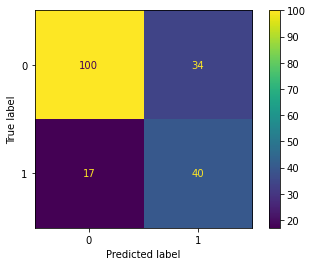

Precision: 0.541
Recall: 0.702
F1: 0.611
Accuracy: 0.733
Mean cross validation score:0.778


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
#applying grid search
parameters={'penalty':['elasticnet','l1','l2','none'],'tol':[1e-4,1],'fit_intercept':[True,False], 
            'class_weight':[None,'balanced'],'random_state':[1], 'C':[0.1,1,5,10],
            'solver':['liblinear', 'sag', 'saga','newton-cg','lbfgs'],'max_iter':[100000000000],
           'multi_class':['auto', 'ovr', 'multinomial'], 'warm_start':[True,False],
           'dual':[True,False],'intercept_scaling':[1,5,],'verbose':[0],'l1_ratio':[0.5,0.1,0.9]}

logistic=GridSearchCV(LogisticRegression(), parameters)
logistic.fit(X_train, y_train)

showMatrix(logistic)


In [21]:
logistic.best_params_

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': 0.5,
 'max_iter': 100000000000,
 'multi_class': 'auto',
 'penalty': 'none',
 'random_state': 1,
 'solver': 'lbfgs',
 'tol': 1,
 'verbose': 0,
 'warm_start': True}

In [22]:
#recreate model using best parameters
best_logistic = LogisticRegression(C= 0.1,class_weight= None,dual= False,fit_intercept= True,
                           intercept_scaling=1,l1_ratio=0.5,max_iter=100000000000,multi_class='auto',
                           penalty='none',random_state= 1,solver='lbfgs',tol=1,verbose= 0,warm_start= True)
#trains the model 
best_logistic.fit(X_train, y_train)


LogisticRegression(C=0.1, l1_ratio=0.5, max_iter=100000000000, penalty='none',
                   random_state=1, tol=1, warm_start=True)

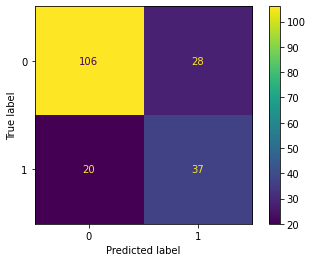

Precision: 0.569
Recall: 0.649
F1: 0.607
Accuracy: 0.749
Mean cross validation score:0.816


In [23]:
from sklearn import svm
from sklearn.svm import SVC
parameters={'kernel':['rbf','linear'],'gamma':['scale', 'auto'],'tol':[1e-3], 
            'random_state':[1],'class_weight':[None,'balanced'], 'C':[0.1,1,5,10,20],
            'max_iter':[10000000],'degree':[3,1,5],'shrinking':[True,False],'decision_function_shape':['ovo','ovr']}
supVect=GridSearchCV(svm.SVC(), parameters)
supVect.fit(X_train, y_train)

showMatrix(supVect)


In [24]:
supVect.best_params_

{'C': 5,
 'class_weight': None,
 'decision_function_shape': 'ovo',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': 10000000,
 'random_state': 1,
 'shrinking': True,
 'tol': 0.001}

In [25]:
#recreate model using best parameters
best_supVect = svm.SVC(C= 5,class_weight=None,decision_function_shape='ovo',degree=3,
                       gamma='scale',kernel='rbf',max_iter= 10000000,random_state=1,
                       shrinking=True,tol=0.001)
#trains the model 
best_supVect.fit(X_train, y_train)

SVC(C=5, decision_function_shape='ovo', max_iter=10000000, random_state=1)

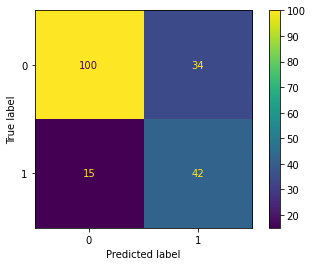

Precision: 0.553
Recall: 0.737
F1: 0.632
Accuracy: 0.743
Mean cross validation score:0.740


In [26]:
from sklearn.naive_bayes import GaussianNB
parameters={'var_smoothing':np.logspace(0,-9, num=100)}
gnb=GridSearchCV(GaussianNB(), parameters)
gnb.fit(X_train, y_train)

showMatrix(gnb)


In [27]:
gnb.best_params_

{'var_smoothing': 0.1873817422860384}

In [28]:
#recreate model using best parameters
best_gnb = GaussianNB(var_smoothing=0.1873817422860384)
#trains the model 
best_gnb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.1873817422860384)

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
#function creates roc and precision recal curve
def create_metrics(model):
    y_score = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
    roc_auc = auc(fpr, tpr)

    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc)
    
    prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=model.classes_[1])
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

    roc_display.plot(ax=ax1)
    pr_display.plot(ax=ax2)
    plt.show()
    

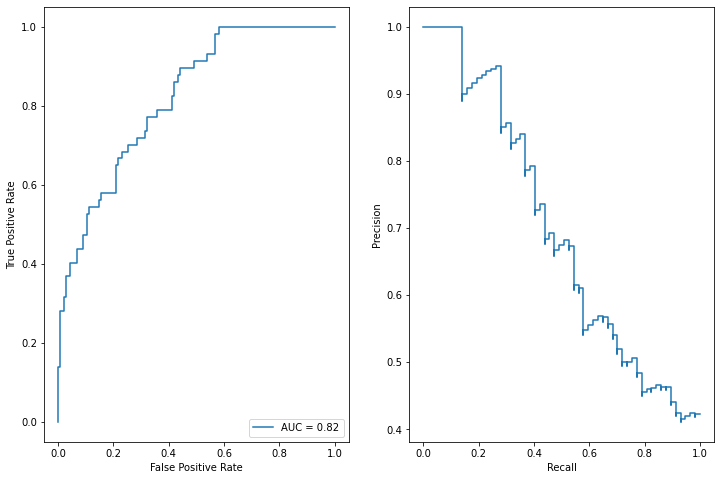

In [37]:
create_metrics(best_logistic)

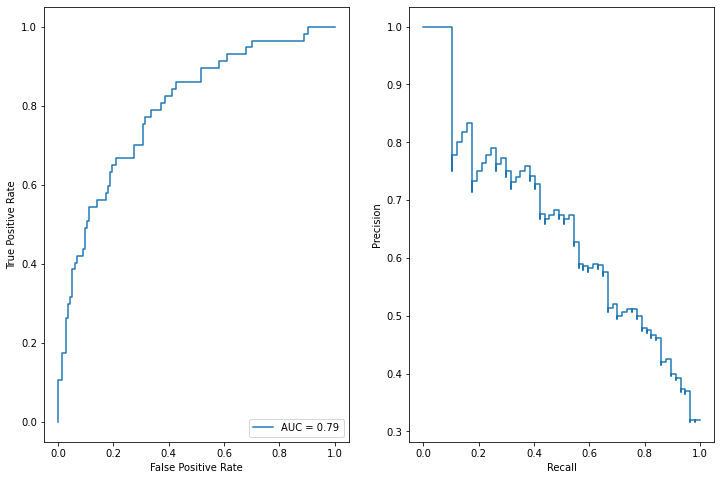

In [38]:
create_metrics(best_supVect)

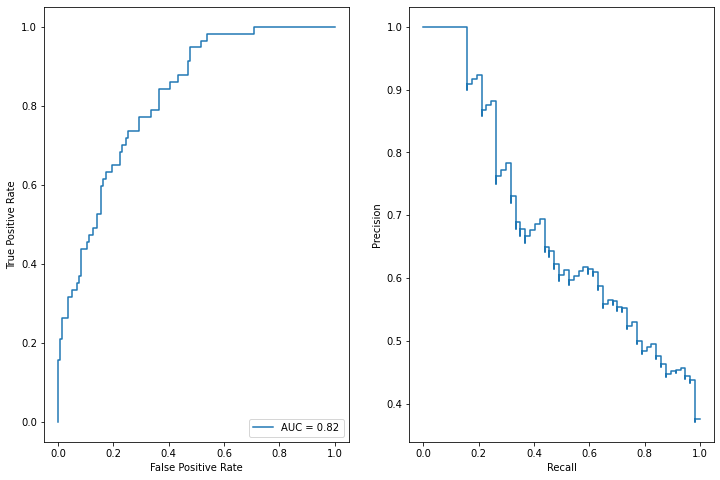

In [40]:
#makes pecision recalll and roc curve for Naive Bayes
y_score=best_gnb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=best_gnb.classes_[1])
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc)

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=best_gnb.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

Using 608 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/191 [00:00<?, ?it/s]

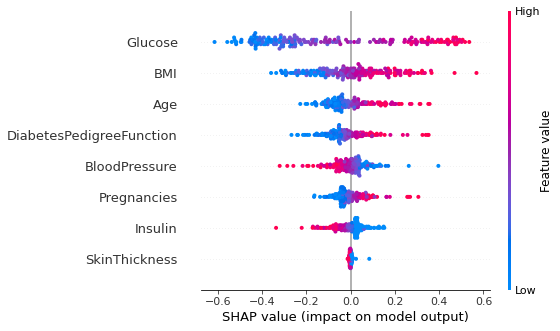

In [41]:
import shap
shap.initjs()
#using SHAP for logisitic regression
explainerL = shap.KernelExplainer(best_logistic.predict, X_train)
shap_valuesL = explainerL.shap_values(X_test)
shap.summary_plot(shap_valuesL, X_test)


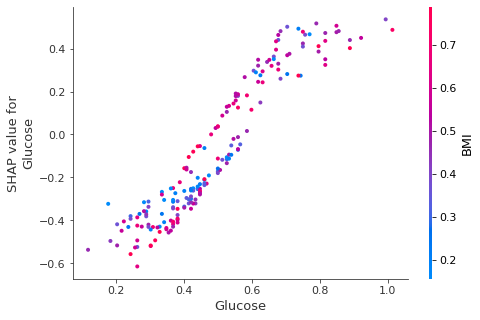

In [42]:
shap.dependence_plot('Glucose', shap_valuesL, X_test)

In [43]:
def forcePlot(expl,x,shap_values):
    return (shap.plots.force(expl.expected_value, shap_values[x],X_test.iloc[[x]],))

In [44]:
forcePlot(explainerL,1,shap_valuesL)

In [45]:
X_test.iloc[[1]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,0.153846,0.401316,0.580645,0.75,0.582317,0.492063,0.585569,0.186047


Using 608 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/191 [00:00<?, ?it/s]

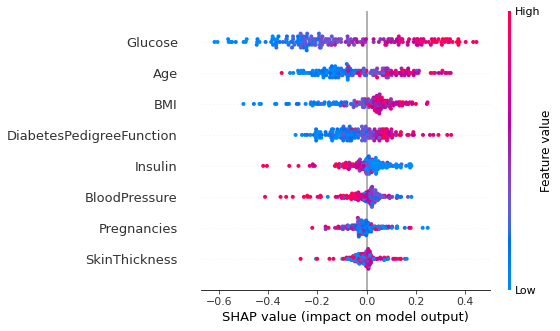

In [46]:
#shap diagrams for Support Vector Diagrams
explainerS = shap.KernelExplainer(best_supVect.predict, X_train)
shap_valuesS = explainerS.shap_values(X_test)
shap.summary_plot(shap_valuesS, X_test)

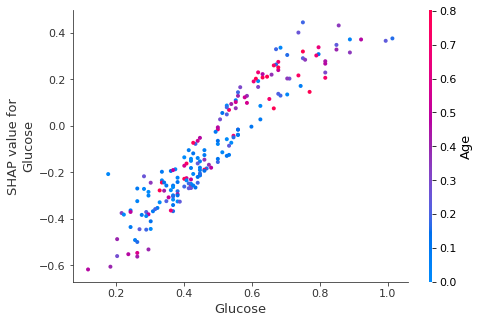

In [47]:
shap.dependence_plot('Glucose', shap_valuesS, X_test)

Using 608 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/191 [00:00<?, ?it/s]

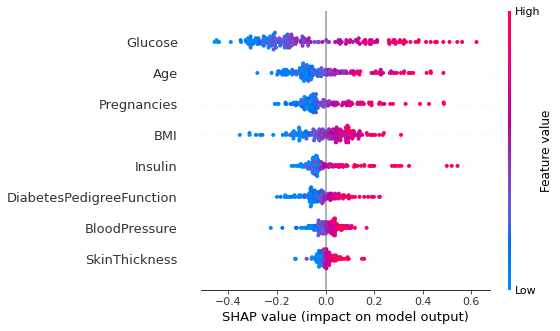

In [48]:
#shap diagrams for Naive Bayes
explainerG = shap.KernelExplainer(best_gnb.predict, X_train)
shap_valuesG = explainerG.shap_values(X_test)
shap.summary_plot(shap_valuesG, X_test)

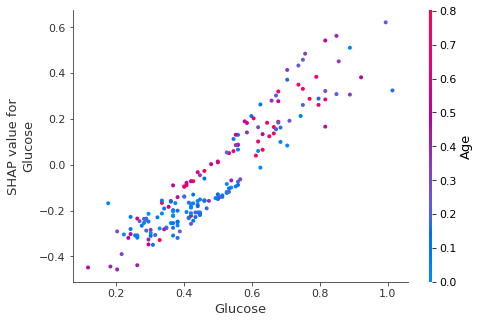

In [49]:
shap.dependence_plot('Glucose', shap_valuesG, X_test)

In [50]:
forcePlot(explainerS,40,shap_valuesS)

In [51]:
forcePlot(explainerG,40,shap_valuesG)

In [52]:
forcePlot(explainerL,40,shap_valuesL)